In [2]:
import numpy as np
import pickle
import tensorflow as tf
import math
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import pad_sequences
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [3]:
# padded test data
with open('../sine_tests.pkl','rb') as fp:
    sin = np.array(pickle.load(fp))
    print sin.shape
#     print(sin[:,0])
    seq=[]
    for i in range(len(sin)):
        seq.append(sin[i][0])
    
    sinee = pad_sequences(seq,maxlen=10,dtype='float32')
    for i in range(len(sin)):
        sin[i][0] = sinee[i] 

(10, 2)


[0.         0.         0.         0.         0.9469883  0.94666654
 0.94634384 0.9460202  0.94569564 0.9453701 ] 0.945043623463436


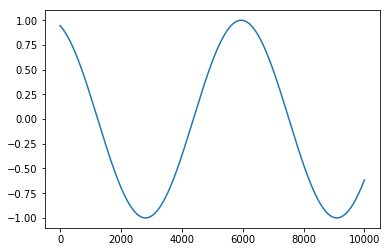

In [4]:
print sin[0][0], sin[0][1][0]
plt.plot(sin[0][1])

(40000,)
((5333, 10, 1), (5333, 1))


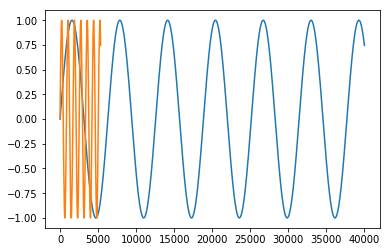

In [5]:
# Create training data
sin_wave = np.array([math.sin(x) for x in np.arange(0,40,0.001)])
print(sin_wave.shape)
x=[]
y=[]
i=0
MAX_SEQ_LEN = 10
while(i<len(sin_wave)-MAX_SEQ_LEN):
    seq_len = np.random.randint(MAX_SEQ_LEN-5,MAX_SEQ_LEN+1)
#     seq_len = 50
#     print(i, seq_len)
    x.append(sin_wave[i:i+seq_len])
    y.append(sin_wave[i+seq_len])
    i+=seq_len
    
plt.plot(sin_wave)
plt.plot(y)
padX = pad_sequences(x, maxlen=MAX_SEQ_LEN,dtype='float32')
x = np.array(padX)
x = np.expand_dims(x, axis=2)
y = np.array(y)
y = np.expand_dims(y, axis=1)
x,y = shuffle(x,y)
print(x.shape, y.shape)

# plt.plot(np.stack(x[0],y[0]))

In [30]:
from keras.layers import Input
from keras.models import Model
from keras.layers.core import Dense, Activation 
from keras.layers.recurrent import SimpleRNN


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
X_train, y_train = shuffle(x, y)


in_out_neurons = 1
hidden_neurons = 4
inp = Input(batch_shape=(None,MAX_SEQ_LEN,in_out_neurons))  

rnn = SimpleRNN(hidden_neurons, return_sequences=False,stateful = False,name="RNN")(inp)

dens = Dense(in_out_neurons,name="dense")(rnn)
model = Model(inputs=[inp],outputs=[dens])

model.compile(loss="mean_squared_error", optimizer="rmsprop")

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 10, 1)             0         
_________________________________________________________________
RNN (SimpleRNN)              (None, 4)                 24        
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________


Train on 5066 samples, validate on 267 samples
Epoch 1/400
5066/5066 [==============================] - 1s 121us/step - loss: 0.7169 - val_loss: 0.2423
Epoch 2/400
5066/5066 [==============================] - 0s 45us/step - loss: 0.0920 - val_loss: 0.0425
Epoch 3/400
5066/5066 [==============================] - 0s 32us/step - loss: 0.0316 - val_loss: 0.0204
Epoch 4/400
5066/5066 [==============================] - 0s 36us/step - loss: 0.0139 - val_loss: 0.0084
Epoch 5/400
5066/5066 [==============================] - 0s 39us/step - loss: 0.0058 - val_loss: 0.0037
Epoch 6/400
5066/5066 [==============================] - 0s 32us/step - loss: 0.0027 - val_loss: 0.0020
Epoch 7/400
5066/5066 [==============================] - 0s 29us/step - loss: 0.0013 - val_loss: 9.3770e-04
Epoch 8/400
5066/5066 [==============================] - 0s 30us/step - loss: 6.4154e-04 - val_loss: 4.4675e-04
Epoch 9/400
5066/5066 [==============================] - 0s 31us/step - loss: 3.3286e-04 - val_loss: 4.0355e

5066/5066 [==============================] - 0s 38us/step - loss: 5.1231e-05 - val_loss: 6.8331e-05
Epoch 74/400
5066/5066 [==============================] - 0s 29us/step - loss: 5.5220e-05 - val_loss: 1.7483e-04
Epoch 75/400
5066/5066 [==============================] - 0s 30us/step - loss: 5.4212e-05 - val_loss: 2.4974e-05
Epoch 76/400
5066/5066 [==============================] - 0s 30us/step - loss: 5.2551e-05 - val_loss: 5.5222e-05
Epoch 77/400
5066/5066 [==============================] - 0s 29us/step - loss: 5.3174e-05 - val_loss: 2.9458e-05
Epoch 78/400
5066/5066 [==============================] - 0s 29us/step - loss: 4.9764e-05 - val_loss: 3.5499e-05
Epoch 79/400
5066/5066 [==============================] - 0s 31us/step - loss: 5.3493e-05 - val_loss: 6.3129e-05
Epoch 80/400
5066/5066 [==============================] - 0s 34us/step - loss: 5.1624e-05 - val_loss: 2.8611e-05
Epoch 81/400
5066/5066 [==============================] - 0s 28us/step - loss: 4.9446e-05 - val_loss: 1.8587e

5066/5066 [==============================] - 0s 38us/step - loss: 4.3831e-05 - val_loss: 2.2015e-05
Epoch 146/400
5066/5066 [==============================] - 0s 30us/step - loss: 4.1121e-05 - val_loss: 8.5032e-06
Epoch 147/400
5066/5066 [==============================] - 0s 30us/step - loss: 3.9321e-05 - val_loss: 1.3065e-05
Epoch 148/400
5066/5066 [==============================] - 0s 33us/step - loss: 4.1612e-05 - val_loss: 1.3832e-05
Epoch 149/400
5066/5066 [==============================] - 0s 35us/step - loss: 4.1342e-05 - val_loss: 8.2710e-06
Epoch 150/400
5066/5066 [==============================] - 0s 29us/step - loss: 4.0233e-05 - val_loss: 8.4545e-05
Epoch 151/400
5066/5066 [==============================] - 0s 29us/step - loss: 4.3130e-05 - val_loss: 1.7690e-05
Epoch 152/400
5066/5066 [==============================] - 0s 31us/step - loss: 3.8435e-05 - val_loss: 9.0476e-05
Epoch 153/400
5066/5066 [==============================] - 0s 30us/step - loss: 3.9436e-05 - val_loss:

Epoch 217/400
5066/5066 [==============================] - 0s 31us/step - loss: 3.2309e-05 - val_loss: 5.3591e-06
Epoch 218/400
5066/5066 [==============================] - 0s 28us/step - loss: 2.9041e-05 - val_loss: 1.3484e-05
Epoch 219/400
5066/5066 [==============================] - 0s 27us/step - loss: 3.2516e-05 - val_loss: 7.4096e-05
Epoch 220/400
5066/5066 [==============================] - 0s 31us/step - loss: 3.1029e-05 - val_loss: 4.0770e-05
Epoch 221/400
5066/5066 [==============================] - 0s 29us/step - loss: 3.0969e-05 - val_loss: 5.9935e-05
Epoch 222/400
5066/5066 [==============================] - 0s 28us/step - loss: 2.8300e-05 - val_loss: 9.9378e-05
Epoch 223/400
5066/5066 [==============================] - 0s 28us/step - loss: 3.2763e-05 - val_loss: 3.0095e-05
Epoch 224/400
5066/5066 [==============================] - 0s 29us/step - loss: 3.0304e-05 - val_loss: 5.4343e-05
Epoch 225/400
5066/5066 [==============================] - 0s 29us/step - loss: 3.1067e-

Epoch 289/400
5066/5066 [==============================] - 0s 34us/step - loss: 2.3146e-05 - val_loss: 1.7808e-05
Epoch 290/400
5066/5066 [==============================] - 0s 30us/step - loss: 2.3949e-05 - val_loss: 6.5640e-06
Epoch 291/400
5066/5066 [==============================] - 0s 31us/step - loss: 2.3113e-05 - val_loss: 2.5729e-05
Epoch 292/400
5066/5066 [==============================] - 0s 32us/step - loss: 2.4919e-05 - val_loss: 1.3487e-05
Epoch 293/400
5066/5066 [==============================] - 0s 34us/step - loss: 2.3368e-05 - val_loss: 1.8185e-05
Epoch 294/400
5066/5066 [==============================] - 0s 36us/step - loss: 2.2532e-05 - val_loss: 3.7560e-05
Epoch 295/400
5066/5066 [==============================] - 0s 31us/step - loss: 2.3757e-05 - val_loss: 2.4836e-05
Epoch 296/400
5066/5066 [==============================] - 0s 30us/step - loss: 2.4397e-05 - val_loss: 7.4572e-06
Epoch 297/400
5066/5066 [==============================] - 0s 29us/step - loss: 2.2122e-

Epoch 361/400
5066/5066 [==============================] - 0s 28us/step - loss: 2.1431e-05 - val_loss: 2.7753e-06
Epoch 362/400
5066/5066 [==============================] - 0s 28us/step - loss: 2.0311e-05 - val_loss: 3.0024e-06
Epoch 363/400
5066/5066 [==============================] - 0s 29us/step - loss: 1.8597e-05 - val_loss: 3.8918e-05
Epoch 364/400
5066/5066 [==============================] - 0s 28us/step - loss: 2.0251e-05 - val_loss: 9.9468e-06
Epoch 365/400
5066/5066 [==============================] - 0s 28us/step - loss: 2.0448e-05 - val_loss: 2.7278e-06
Epoch 366/400
5066/5066 [==============================] - 0s 29us/step - loss: 1.8965e-05 - val_loss: 7.5377e-05
Epoch 367/400
5066/5066 [==============================] - 0s 28us/step - loss: 1.9727e-05 - val_loss: 2.3126e-05
Epoch 368/400
5066/5066 [==============================] - 0s 29us/step - loss: 2.0145e-05 - val_loss: 1.7413e-06
Epoch 369/400
5066/5066 [==============================] - 0s 28us/step - loss: 1.8829e-

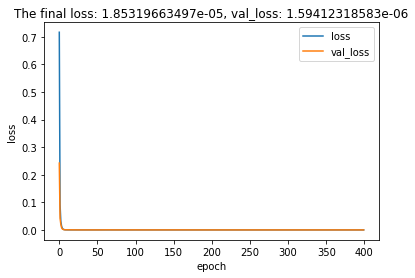

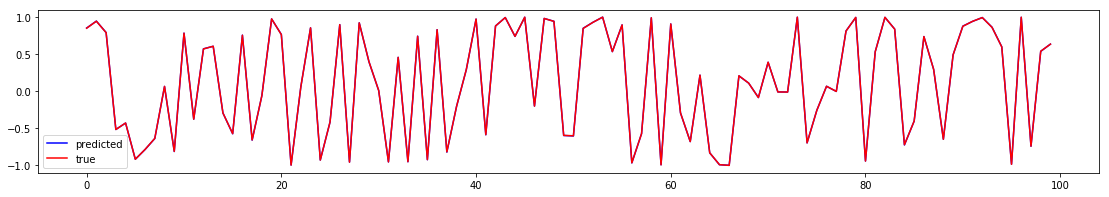

In [31]:

hist = model.fit(X_train, y_train, batch_size=60, epochs=400, 
                 verbose=1,validation_split=0.05)
for label in ["loss","val_loss"]:
    plt.plot(hist.history[label],label=label)

plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("The final loss: {}, val_loss: {}".format(hist.history["loss"][-1],hist.history["val_loss"][-1]))
plt.legend()
plt.show()
y_pred = model.predict(X_test)
plt.figure(figsize=(19,3))
# print(y_test[:2])
# print(y_pred[:2])
plt.plot(y_pred[:100],'b-',label="predicted")
plt.plot(y_test[:100], 'r-', label="true")
plt.legend()
plt.show()

In [69]:
from keras.models import load_model
model.save('sin_model.h5')

9991/9991 [==============================] - 0s 17us/step
((9991, 10, 1), (9991, 1))


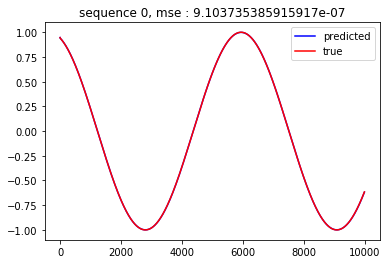

9991/9991 [==============================] - 0s 18us/step
((9991, 10, 1), (9991, 1))


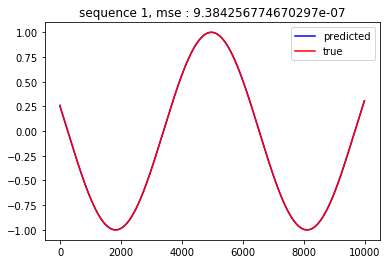

9991/9991 [==============================] - 0s 17us/step
((9991, 10, 1), (9991, 1))


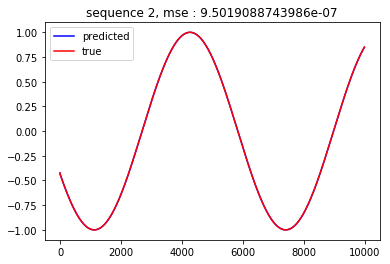

9991/9991 [==============================] - 0s 18us/step
((9991, 10, 1), (9991, 1))


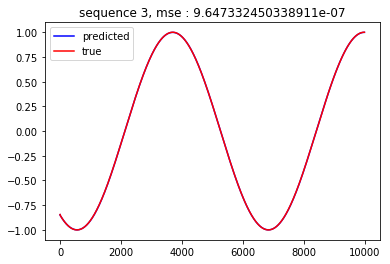

9991/9991 [==============================] - 0s 30us/step
((9991, 10, 1), (9991, 1))


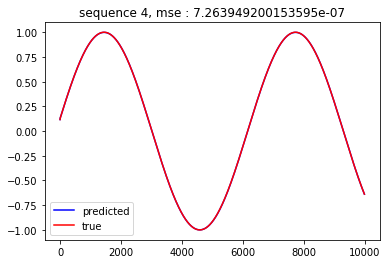

9991/9991 [==============================] - 0s 23us/step
((9991, 10, 1), (9991, 1))


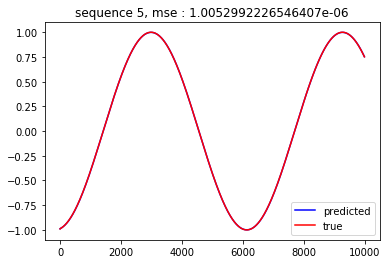

9991/9991 [==============================] - 0s 17us/step
((9991, 10, 1), (9991, 1))


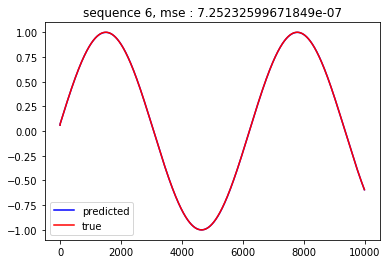

9991/9991 [==============================] - 0s 18us/step
((9991, 10, 1), (9991, 1))


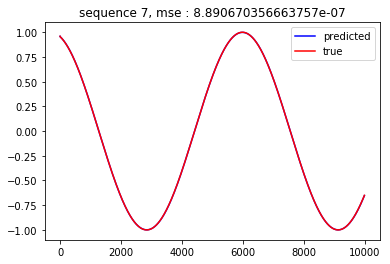

9991/9991 [==============================] - 0s 19us/step
((9991, 10, 1), (9991, 1))


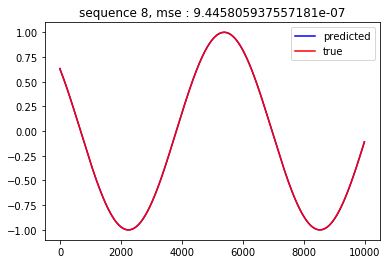

9991/9991 [==============================] - 0s 17us/step
((9991, 10, 1), (9991, 1))


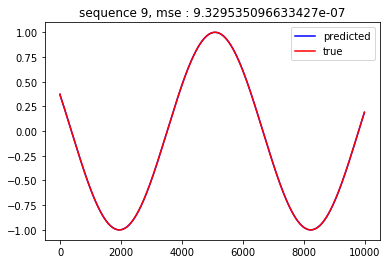

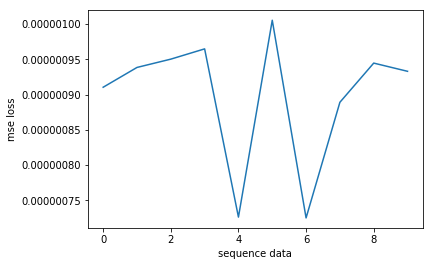

In [68]:
# Creating test data
# l = np.random.randint(len(sin))
# print l
mse=[]
for l in range(len(sin)):
    sin_test=[]
    sin_label=[]
    sin_test.append(sin[l][0])
    sin_label.append(sin[l][1][0])
    i=0
    seq_len = len(sin[l][0])
    while(i<len(sin[l][1])-MAX_SEQ_LEN):
    #     seq_len = np.random.randint(MAX_SEQ_LEN-5,MAX_SEQ_LEN+1)
    #     seq_len = 50
    #     print(i, seq_len)
        sin_test.append(sin[l][1][i:i+seq_len])
        sin_label.append(sin[l][1][i+seq_len])
        i+=1

    # plt.plot(sin[l][1])
    padXs = pad_sequences(sin_test, maxlen=MAX_SEQ_LEN,dtype='float32')
    sin_test = np.array(padXs)
    sin_test = np.expand_dims(sin_test, axis=2)
    sin_label = np.array(sin_label)
    sin_label = np.expand_dims(sin_label, axis=1)
    
    y_pred = model.predict(sin_test)
    z= model.evaluate(sin_test,sin_label)
    mse.append(z)
    plt.plot(y_pred[:],'b-',label="predicted")
    plt.plot(sin_label[:], 'r-', label="true")
    plt.legend()
    
    plt.title("sequence "+str(l)+", mse : "+str(model.evaluate(sin_test, sin_label)))
    print(sin_test.shape, sin_label.shape)
    plt.savefig("sequence_"+str(l)+"_sin.png")
    plt.show()
plt.plot(mse)
plt.xlabel("sequence data")
plt.ylabel("mse loss")
plt.savefig('mse_loss_sin.png')
plt.show()

9991/9991 [==============================] - 0s 23us/step
7.263949200153595e-07


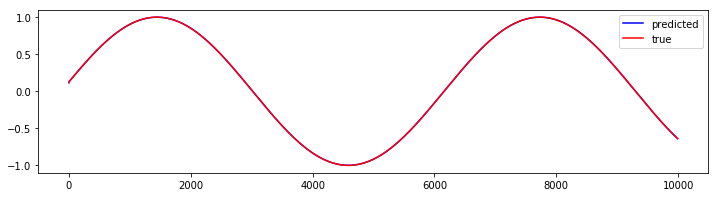

In [54]:
# sin_test,sin_label = shuffle(sin_test,sin_label)
print( model.evaluate(sin_test, sin_label))
y_pred = model.predict(sin_test)
plt.figure(figsize=(12,3))
# print(sin_label[:2])
# print(y_pred[:2])
plt.plot(y_pred[:],'b-',label="predicted")
plt.plot(sin_label[:], 'r-', label="true")
plt.legend()
plt.show()

1000/1000 [==============================] - 0s 31us/step


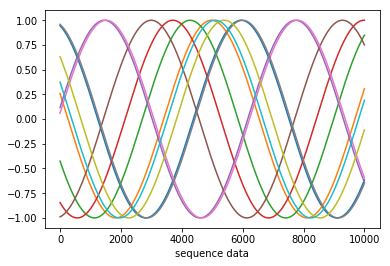

Text(0,0.5,'mse loss')

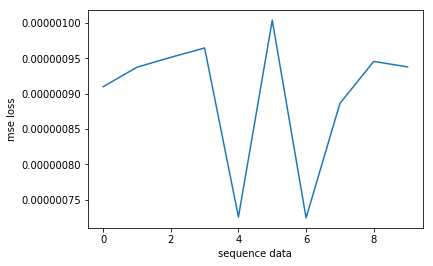

In [50]:
mse=[]
for l in range(len(sin)):
    sin_test=[]
    sin_label=[]
    sin_test.append(sin[l][0])
    sin_label.append(sin[l][1][0])
    i=0
    seq_len=len(sin[l][0])
    while(i<len(sin[l][1])-10):
#         seq_len = np.random.randint(5,11)
    #     seq_len = 50
    #     print(i, seq_len)
        sin_test.append(sin[l][1][i:i+seq_len])
        sin_label.append(sin[l][1][i+seq_len])
        i+=seq_len

    plt.plot(sin[l][1])
    padXs = pad_sequences(sin_test, maxlen=10,dtype='float32')
    sin_test = np.array(padXs)
    sin_test = np.expand_dims(sin_test, axis=2)
    sin_label = np.array(sin_label)
    sin_label = np.expand_dims(sin_label, axis=1)
    sin_test,sin_label = shuffle(sin_test,sin_label)
#     print(sin_test.shape, sin_label.shape)
    z= model.evaluate(sin_test,sin_label)
    mse.append(z)

plt.xlabel("sequence data")
plt.ylabel("")
plt.show()
plt.plot(mse)
plt.xlabel("sequence data")
plt.ylabel("mse loss")